In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.cm as cm
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
import h5py
from scipy.stats import pearsonr
import glob, json
from scipy.special import erf
from plot_corner import *
import sys
sys.path.append('./../code/')
from support import *

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Figure 1

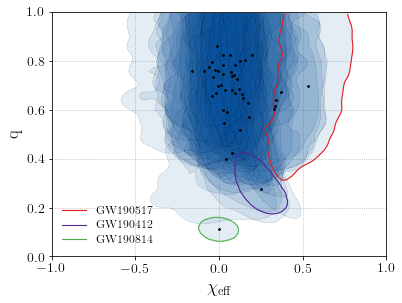

In [2]:
fig,ax = plt.subplots(figsize=(6,4.5))

chi_grid = np.linspace(-1,1,70)
q_grid = np.linspace(0,1,69)
dchi = chi_grid[1] - chi_grid[0]
dq = q_grid[1] - q_grid[0]

posteriors_w190814 = np.load("./../input/sampleDict_w190814.pickle",allow_pickle=True)
for i,key in enumerate(list(posteriors_w190814.keys())):
    
    chis = posteriors_w190814[key]['Xeff']
    m1s = posteriors_w190814[key]['m1']
    m2s = posteriors_w190814[key]['m2']
    qs = m2s/m1s
    
    heights,edgex,edgey = np.histogram2d(chis,qs,bins=(chi_grid,q_grid))
    heights = gaussian_filter(heights,1.5)
    heights /= np.sum(heights)*dchi*dq
    heights_large_to_small = np.sort(heights.reshape(-1))[::-1]
    cdf = np.cumsum(heights_large_to_small)*dchi*dq
    
    num_grid_pts = np.where(cdf>0.9)[0][0]
    h90 = np.interp(0.9,cdf,heights_large_to_small)
    
    ax.scatter([np.median(chis)],[np.median(qs)],color='black',zorder=100,s=3)
    
    if key=='S190517h':
        ax.contour((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights.T,levels=(h90,np.inf),colors='#e31a1c',linewidths=1.1)
    elif key=='S190412m':
        ax.contour((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights.T,levels=(h90,np.inf),colors='#54278f',linewidths=1.1)
    elif key=='S190814bv':
        ax.contour((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights.T,levels=(h90,np.inf),colors='#4daf4a',linewidths=1.1)
    else:
        ax.contour((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights.T,levels=(h90,np.inf),colors='black',linewidths=0.3,alpha=0.2)
    ax.contourf((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights.T,levels=(h90,np.inf),colors='#08519c',alpha=0.1)
 

custom_lines = [Line2D([0], [0], color='#e31a1c', lw=1.1),
                Line2D([0], [0], color='#54278f', lw=1.1),
                Line2D([0], [0], color='#4daf4a', lw=1.1)]
ax.legend(custom_lines, ['GW190517', 'GW190412', 'GW190814'],loc='lower left',fontsize=12,frameon=False,labelspacing=0.3)

ax.set_xlabel(r'$\chi_\mathrm{eff}$',fontsize=18)
ax.set_ylabel(r'q',fontsize=18)
ax.xaxis.grid(True,which='major',ls=':')
ax.yaxis.grid(True,which='major',ls=':')
ax.set_axisbelow(True)
ax.tick_params(labelsize=14)
ax.set_xlim(-1,1)
ax.set_ylim(0,1)

plt.savefig('fig-1-a.pdf',bbox_inches='tight')

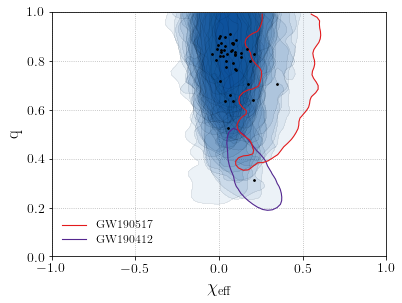

In [5]:
posteriors = np.load("./../input/sampleDict.pickle",allow_pickle=True)
reweightedDict = np.load('reweighted_samples_noEvolution.npy',allow_pickle=True)[()]
resampled_q_noEvol = reweightedDict['resampled_q']
resampled_x_noEvol = reweightedDict['resampled_chi']

fig,ax = plt.subplots(figsize=(6,4.5))

chi_grid = np.linspace(-1,1,70)
q_grid = np.linspace(0,1,69)
dchi = chi_grid[1] - chi_grid[0]
dq = q_grid[1] - q_grid[0]

for i in range(resampled_q_noEvol.shape[0]):
    
    chis = resampled_x_noEvol[i,:]
    qs = resampled_q_noEvol[i,:]
    
    heights,edgex,edgey = np.histogram2d(chis,qs,bins=(chi_grid,q_grid))
    heights = gaussian_filter(heights,1.5)
    heights /= np.sum(heights)*dchi*dq
    heights_large_to_small = np.sort(heights.reshape(-1))[::-1]
    cdf = np.cumsum(heights_large_to_small)*dchi*dq
    
    num_grid_pts = np.where(cdf>0.9)[0][0]
    h90 = np.interp(0.9,cdf,heights_large_to_small)
    
    ax.scatter([np.median(chis)],[np.median(qs)],color='black',zorder=100,s=3)
    
    i190517=np.where(np.array(list(posteriors.keys()))=='S190517h')[0][0]
    i190412=np.where(np.array(list(posteriors.keys()))=='S190412m')[0][0]
    
    if i==i190517:
        ax.contour((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights.T,levels=(h90,np.inf),colors='#e31a1c',linewidths=1.1)
    elif i==i190412:
        ax.contour((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights.T,levels=(h90,np.inf),colors='#54278f',linewidths=1.1)
    else:
        ax.contour((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights.T,levels=(h90,np.inf),colors='black',linewidths=0.3,alpha=0.2)

    ax.contourf((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights.T,levels=(h90,np.inf),colors='#08519c',alpha=0.075)
 

custom_lines = [Line2D([0], [0], color='#e31a1c', lw=1.1),
                Line2D([0], [0], color='#54278f', lw=1.1)]
ax.legend(custom_lines, ['GW190517', 'GW190412'],loc='lower left',fontsize=12,frameon=False,labelspacing=0.3)

ax.set_xlabel(r'$\chi_\mathrm{eff}$',fontsize=18)
ax.set_ylabel(r'q',fontsize=18)
ax.xaxis.grid(True,which='major',ls=':')
ax.yaxis.grid(True,which='major',ls=':')
ax.set_axisbelow(True)
ax.tick_params(labelsize=14)
ax.set_xlim(-1,1)
ax.set_ylim(0,1)

plt.savefig('fig-1-b.pdf',bbox_inches='tight')

# Figure 2

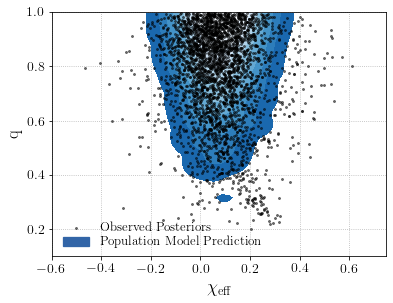

In [8]:
reweightedDict = np.load('reweighted_samples_noEvolution.npy',allow_pickle=True)[()]
mock_q_noEvol = reweightedDict['mock_q']
mock_x_noEvol = reweightedDict['mock_chi']
resampled_q_noEvol = reweightedDict['resampled_q']
resampled_x_noEvol = reweightedDict['resampled_chi']

fig = plt.figure(figsize=(6,4.5))

cats = np.random.choice(np.arange(resampled_x_noEvol.shape[1]),size=75,replace=False)
ax = fig.add_subplot(111)

chi_grid = np.linspace(-1,1,70)
q_grid = np.linspace(0,1,69)
dchi = chi_grid[1] - chi_grid[0]
dq = q_grid[1] - q_grid[0]
    
heights,edgex,edgey = np.histogram2d(mock_x_noEvol.reshape(-1),mock_q_noEvol.reshape(-1),bins=(chi_grid,q_grid))
heights = gaussian_filter(heights,1.5)
heights /= np.sum(heights)*dchi*dq
heights_large_to_small = np.sort(heights.reshape(-1))[::-1]
cdf = np.cumsum(heights_large_to_small)*dchi*dq

num_grid_pts = np.where(cdf>0.9)[0][0]
h90 = np.interp(0.9,cdf,heights_large_to_small)
h80 = np.interp(0.8,cdf,heights_large_to_small)
h70 = np.interp(0.7,cdf,heights_large_to_small)
h60 = np.interp(0.6,cdf,heights_large_to_small)
h50 = np.interp(0.5,cdf,heights_large_to_small)
h40 = np.interp(0.4,cdf,heights_large_to_small)
h30 = np.interp(0.3,cdf,heights_large_to_small)
h20 = np.interp(0.2,cdf,heights_large_to_small)
h10 = np.interp(0.1,cdf,heights_large_to_small)

ax.contourf((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights.T,levels=(h90,h80,h70,h60,h50,h40,h30,h20,h10,np.inf),cmap=cm.Blues_r,vmin=-1,vmax=h10)

ax.scatter(resampled_x_noEvol[:,cats].reshape(-1),resampled_q_noEvol[:,cats].reshape(-1),marker='.',color='black',s=15,zorder=2,alpha=0.5,label='Observed Posteriors')

ax.set_xlim(-0.6,0.75)
ax.set_ylim(0.1,1)
ax.set_xlabel(r'$\chi_\mathrm{eff}$',fontsize=18)
ax.set_ylabel(r'q',fontsize=18)
ax.xaxis.grid(True,which='major',ls=':')
ax.yaxis.grid(True,which='major',ls=':')
ax.set_axisbelow(True)
ax.tick_params(labelsize=14)

custom_lines = [Rectangle((0,0),0,0, color='#3265A7', lw=1.3)]
leg2 = plt.legend(custom_lines, ['Population Model Prediction'],loc=(0.02,0.01),fontsize=13,frameon=False,labelspacing=0.3)

ax.legend(frameon=False,loc=(0.02,0.07),fontsize=13)
ax.add_artist(leg2)

plt.savefig('fig-2-a.pdf',bbox_inches='tight')
plt.show()

In [10]:
# Next, repeatedly draw catalogs of mock events and reweighted posteriors, computing the least-squares slope for each
# Instantiate arrays to hold results
n_catalogs = resampled_x_noEvol.shape[1]
obs_slope = np.zeros(n_catalogs)
mock_slope = np.zeros(n_catalogs)

# Loop over catalog instantiations
for i in range(n_catalogs):
    
    # Read out spins and mass ratios
    obs_qs = resampled_q_noEvol[:,i]
    mock_qs = mock_q_noEvol[:,i]
    obs_xs = resampled_x_noEvol[:,i]
    mock_xs = mock_x_noEvol[:,i]
    
    # Compute slopes and save
    X = np.transpose([np.ones(obs_qs.size),obs_qs])
    b,m = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(obs_xs)
    obs_slope[i] = m
    
    X = np.transpose([np.ones(mock_qs.size),mock_qs])
    b,m = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(mock_xs)
    mock_slope[i] = m

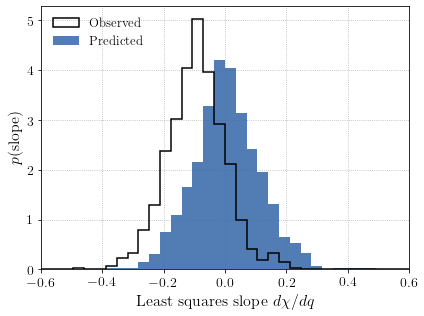

In [11]:
fig = plt.figure(figsize=(6,4.5))

ax = fig.add_subplot(111)
ax.hist(obs_slope,label='Observed',bins=np.linspace(-0.6,0.6,35),density=True,color='black',histtype='step',lw=1.5)
ax.hist(mock_slope,alpha=0.85,label='Predicted',bins=np.linspace(-0.6,0.6,35),color='#3265A7',density=True)
plt.legend(loc='upper left',fontsize=13,frameon=False)
ax.set_xlim(-0.6,0.6)
ax.set_xlabel("Least squares slope $d\chi/dq$",fontsize=16)
ax.set_ylabel(r"$p(\mathrm{slope})$",fontsize=16)

ax.xaxis.grid(True,which='major',ls=':')
ax.yaxis.grid(True,which='major',ls=':')
ax.set_axisbelow(True)
ax.tick_params(labelsize=14)

plt.tight_layout()
plt.savefig('fig-2-b.pdf',bbox_inches='tight')
plt.show()

# Figure 3

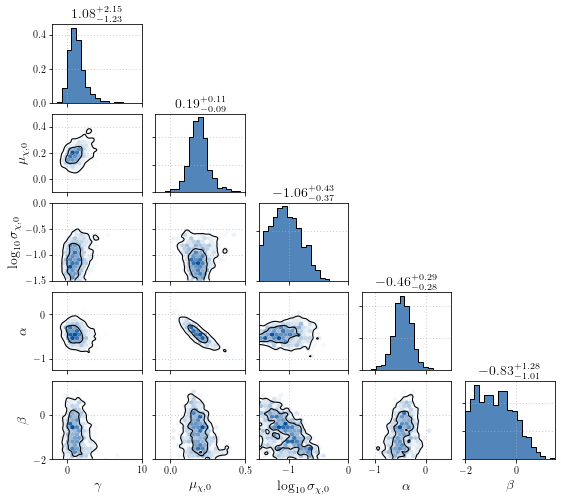

In [2]:
samps = np.load('./../code/output/processed_emcee_samples_plPeak_r00.npy')

toPlot = {
    'beta':{'data':samps[:,5],'plot_bounds':(-2,10),'label':r'$\gamma$'},
    'mu0':{'data':samps[:,7],'plot_bounds':(-0.1,0.5),'label':r'$\mu_{\chi,0}$'},
    'sig0':{'data':samps[:,8],'plot_bounds':(-1.5,0.),'label':r'$\log_{10}\sigma_{\chi,0}$'},
    'a':{'data':samps[:,9],'plot_bounds':(-1.25,0.5),'label':r'$\alpha$'},
    'b':{'data':samps[:,10],'plot_bounds':(-2,1.5),'label':r'$\beta$'}
    }               
    
fig = plt.figure(figsize=(9,8))
plot_corner(fig,toPlot,'#08519c',kernel=2.5)
fig.subplots_adjust(wspace=0.15, hspace=0.14)
plt.savefig('fig-3.pdf',bbox_inches='tight')
plt.show()

# Figure 4

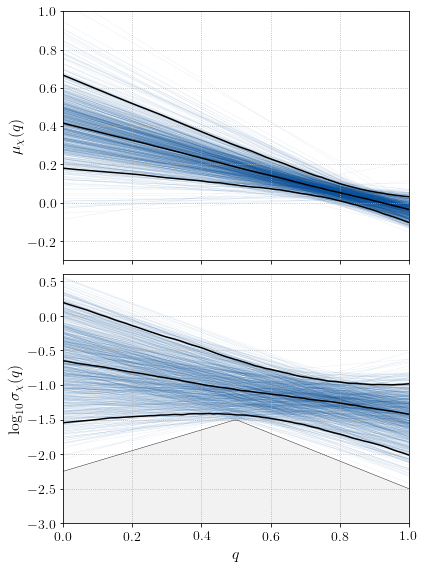

In [3]:
samps = np.load('./../code/output/processed_emcee_samples_plPeak_r00.npy')

fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

qs = np.linspace(0,1,100)
mu_qs = np.zeros((qs.size,samps.shape[0]))
logsig_qs = np.zeros((qs.size,samps.shape[0]))
for i in range(samps.shape[0]):
    
    mu0 = samps[i,7]
    logsig0 = samps[i,8]
    alpha = samps[i,9]
    beta = samps[i,10]
    
    mus = mu0 + alpha*(qs-0.5)
    logsigs = logsig0 + beta*(qs-0.5)
    
    mu_qs[:,i] = mus
    logsig_qs[:,i] = logsigs
    
    ax1.plot(qs,mus,color='#08519c',alpha=0.2,lw=0.2,zorder=-2)
    ax2.plot(qs,logsigs,color='#08519c',alpha=0.2,lw=0.2,zorder=-2)
    
ax1.plot(qs, np.quantile(mu_qs,0.5,axis=1), color='black')
ax1.plot(qs, np.quantile(mu_qs,0.05,axis=1), color='black')
ax1.plot(qs, np.quantile(mu_qs,0.95,axis=1), color='black')

ax2.plot(qs, np.quantile(logsig_qs,0.5,axis=1), color='black')
ax2.plot(qs, np.quantile(logsig_qs,0.05,axis=1), color='black')
ax2.plot(qs, np.quantile(logsig_qs,0.95,axis=1), color='black')

ax2.plot(qs, np.minimum(-1.5 + (-2)*(qs-0.5), -1.5 + 1.5*(qs-0.5)),color='black',lw=0.4)
ax2.fill_between(qs, np.minimum(-1.5 + (-2)*(qs-0.5), -1.5 + 1.5*(qs-0.5)), y2=-3, facecolor='grey',alpha=0.1)

ax1.set_rasterization_zorder(-1)
ax1.set_xlim(0,1)
ax1.set_ylim(-0.3,1.0)
ax1.xaxis.grid(True,which='major',ls=':')
ax1.yaxis.grid(True,which='major',ls=':')
ax1.set_axisbelow(True)
ax1.tick_params(labelsize=14)
ax1.set_xticklabels([])
ax1.set_ylabel(r"$\mu_\chi(q)$",fontsize=16)

ax2.set_rasterization_zorder(-1)
ax2.set_xlim(0,1)
ax2.set_ylim(-3,0.6)
ax2.xaxis.grid(True,which='major',ls=':')
ax2.yaxis.grid(True,which='major',ls=':')
ax2.set_axisbelow(True)
ax2.tick_params(labelsize=14)
ax2.set_xlabel(r"$q$",fontsize=16)
ax2.set_ylabel(r"$\log_{10}\sigma_\chi(q)$",fontsize=16)
    
plt.tight_layout()
plt.savefig('fig-4.pdf',bbox_inches='tight')
plt.show()

# Figure 5

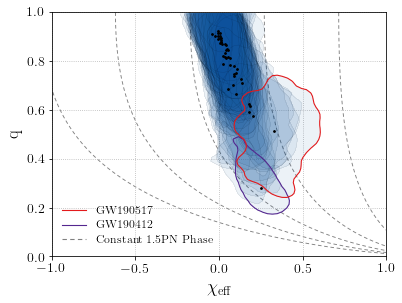

In [5]:
posteriors = np.load("./../input/sampleDict.pickle",allow_pickle=True)
reweightedDict = np.load('reweighted_samples_yesEvolution.npy',allow_pickle=True)[()]
resampled_q = reweightedDict['resampled_q']
resampled_x = reweightedDict['resampled_chi']

fig,ax = plt.subplots(figsize=(6,4.5))

chi_grid = np.linspace(-1,1,70)
q_grid = np.linspace(0,1,69)
dchi = chi_grid[1] - chi_grid[0]
dq = q_grid[1] - q_grid[0]

for i in range(resampled_q.shape[0]):
    
    chis = resampled_x[i,:]
    qs = resampled_q[i,:]
    
    heights,edgex,edgey = np.histogram2d(chis,qs,bins=(chi_grid,q_grid))
    heights = gaussian_filter(heights,1.5)
    heights /= np.sum(heights)*dchi*dq
    heights_large_to_small = np.sort(heights.reshape(-1))[::-1]
    cdf = np.cumsum(heights_large_to_small)*dchi*dq
    
    num_grid_pts = np.where(cdf>0.9)[0][0]
    h90 = np.interp(0.9,cdf,heights_large_to_small)
    
    ax.scatter([np.median(chis)],[np.median(qs)],color='black',zorder=100,s=3)
    
    i190517=np.where(np.array(list(posteriors.keys()))=='S190517h')[0][0]
    i190412=np.where(np.array(list(posteriors.keys()))=='S190412m')[0][0]
    
    if i==i190517:
        ax.contour((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights.T,levels=(h90,np.inf),colors='#e31a1c',linewidths=1.1)
    elif i==i190412:
        ax.contour((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights.T,levels=(h90,np.inf),colors='#54278f',linewidths=1.1)
    else:
        ax.contour((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights.T,levels=(h90,np.inf),colors='black',linewidths=0.3,alpha=0.2)
    ax.contourf((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights.T,levels=(h90,np.inf),colors='#08519c',alpha=0.075)
 
# See Ng+ Eq. A2
for dphase in np.linspace(-4.5,-1.5,5):
    qs = np.linspace(0.01,1,100)
    etas = qs/(1.+qs)**2
    chi_effs = (dphase*etas**(3./5.) + 3.*np.pi/8.)*128./(113.-76.*etas)
    ax.plot(chi_effs,qs,color='grey',dashes=(4,3),zorder=-1,lw=0.9)

custom_lines = [Line2D([0], [0], color='#e31a1c', lw=1.1),
                Line2D([0], [0], color='#54278f', lw=1.1),
                Line2D([0], [0], color='grey', lw=1.1,dashes=(4,3))]
ax.legend(custom_lines, ['GW190517', 'GW190412','Constant 1.5PN Phase'],loc='lower left',fontsize=12,frameon=False,labelspacing=0.3)

ax.set_xlabel(r'$\chi_\mathrm{eff}$',fontsize=18)
ax.set_ylabel(r'q',fontsize=18)
ax.xaxis.grid(True,which='major',ls=':')
ax.yaxis.grid(True,which='major',ls=':')
ax.set_axisbelow(True)
ax.tick_params(labelsize=14)
ax.set_xlim(-1,1)
ax.set_ylim(0,1)

plt.savefig('fig-5.pdf',bbox_inches='tight')

# Figure 6

In [2]:
reweightedDict = np.load('reweighted_samples_yesEvolution.npy',allow_pickle=True)[()]
resampled_q = reweightedDict['resampled_q']
resampled_x = reweightedDict['resampled_chi']
mock_q = reweightedDict['mock_q']
mock_x = reweightedDict['mock_chi']

n_catalogs = resampled_q.shape[1]
obs_slope_evol = np.zeros(n_catalogs)
mock_slope_evol = np.zeros(n_catalogs)

for i in range(n_catalogs):
    
    obs_qs = resampled_q[:,i]
    mock_qs = mock_q[:,i]
    obs_xs = resampled_x[:,i]
    mock_xs = mock_x[:,i]
    
    X = np.transpose([np.ones(obs_qs.size),obs_qs])
    b,m = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(obs_xs)
    obs_slope_evol[i] = m
    
    X = np.transpose([np.ones(mock_qs.size),mock_qs])
    b,m = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(mock_xs)
    mock_slope_evol[i] = m

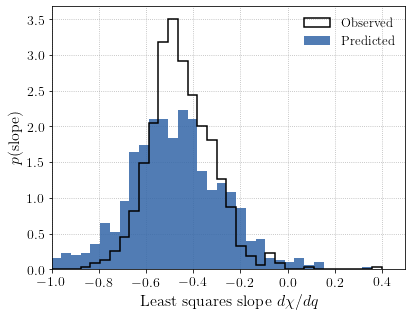

In [3]:
fig = plt.figure(figsize=(6,4.5))

ax = fig.add_subplot(111)
ax.hist(obs_slope_evol,label='Observed',bins=np.linspace(-1,0.4,35),density=True,color='black',histtype='step',lw=1.5)
ax.hist(mock_slope_evol,alpha=0.85,label='Predicted',bins=np.linspace(-1,0.4,35),color='#3265A7',density=True)
plt.legend(loc='upper right',fontsize=13,frameon=False)
ax.set_xlim(-1,0.5)
ax.set_xlabel("Least squares slope $d\chi/dq$",fontsize=16)
ax.set_ylabel(r"$p(\mathrm{slope})$",fontsize=16)

ax.xaxis.grid(True,which='major',ls=':')
ax.yaxis.grid(True,which='major',ls=':')
ax.set_axisbelow(True)
ax.tick_params(labelsize=14)

plt.tight_layout()
plt.savefig('fig-6.pdf',bbox_inches='tight')
plt.show()

# Figure 7

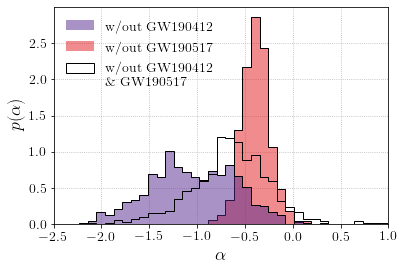

In [4]:
samps_no190412 = np.load('./../code/output/processed_emcee_samples_plPeak_no190412_r00.npy')
samps_no190517 = np.load('./../code/output/processed_emcee_samples_plPeak_no190517_r00.npy')
samps_no190412_no190517 = np.load('./../code/output/processed_emcee_samples_plPeak_no190412_no190517_r00.npy')

fig,ax = plt.subplots()

ax.hist(samps_no190412[:,9],bins=np.linspace(-2.5,1,40),histtype='stepfilled',
        color='#54278f',label='w/out GW190412',alpha=0.5,zorder=4,density=True)
ax.hist(samps_no190412[:,9],bins=np.linspace(-2.5,1,40),histtype='step',
        color='black',zorder=5,density=True)

ax.hist(samps_no190517[:,9],bins=np.linspace(-2.5,1,40),histtype='stepfilled',
        color='#e31a1c',label='w/out GW190517',alpha=0.5,zorder=2,density=True)
ax.hist(samps_no190517[:,9],bins=np.linspace(-2.5,1,40),histtype='step',
        color='black',zorder=3,density=True)

ax.hist(samps_no190412_no190517[:,9],bins=np.linspace(-2.5,1,40),histtype='step',
        color='black',density=True,zorder=10)

leg2 = plt.legend([Rectangle((0,0),1,1,facecolor='white',edgecolor='black')],['w/out GW190412 \n \& GW190517'],
                  fontsize=14,frameon=False,loc=(0.021,0.63))
leg2.get_texts()[0].set_position((0,-7.5))

leg = ax.legend(loc='upper left',fontsize=14,frameon=False)
plt.gca().add_artist(leg2)

ax.xaxis.grid(True,which='major',ls=':')
ax.yaxis.grid(True,which='major',ls=':')
ax.set_axisbelow(True)
ax.tick_params(labelsize=14)
ax.set_xlabel(r'$\alpha$',fontsize=18)
ax.set_ylabel(r'$p(\alpha)$',fontsize=18)
ax.set_xlim(-2.5,1.)

plt.savefig('fig-7.pdf',bbox_inches='tight')
plt.show()

# Figure 8

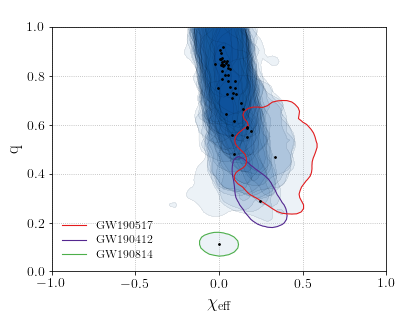

In [6]:
posteriors_w190814 = np.load("./../input/sampleDict_w190814.pickle",allow_pickle=True)
reweightedDict = np.load('reweighted_samples_yesEvolution_w190814.npy',allow_pickle=True)[()]
resampled_q_w190814 = reweightedDict['resampled_q']
resampled_x_w190814 = reweightedDict['resampled_chi']

fig,ax = plt.subplots(figsize=(6,4.5))

chi_grid = np.linspace(-1,1,70)
q_grid = np.linspace(0,1,69)
dchi = chi_grid[1] - chi_grid[0]
dq = q_grid[1] - q_grid[0]

for i in range(resampled_q_w190814.shape[0]):
    
    chis = resampled_x_w190814[i,:]
    qs = resampled_q_w190814[i,:]
    
    heights,edgex,edgey = np.histogram2d(chis,qs,bins=(chi_grid,q_grid))
    heights = gaussian_filter(heights,1.5)
    heights /= np.sum(heights)*dchi*dq
    heights_large_to_small = np.sort(heights.reshape(-1))[::-1]
    cdf = np.cumsum(heights_large_to_small)*dchi*dq
    
    num_grid_pts = np.where(cdf>0.9)[0][0]
    h90 = np.interp(0.9,cdf,heights_large_to_small)
    
    ax.scatter([np.median(chis)],[np.median(qs)],color='black',zorder=100,s=3)
    
    i190517=np.where(np.array(list(posteriors_w190814.keys()))=='S190517h')[0][0]
    i190412=np.where(np.array(list(posteriors_w190814.keys()))=='S190412m')[0][0]
    i190814=np.where(np.array(list(posteriors_w190814.keys()))=='S190814bv')[0][0]
    
    if i==i190517:
        ax.contour((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights.T,levels=(h90,np.inf),colors='#e31a1c',linewidths=1.1)
    elif i==i190412:
        ax.contour((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights.T,levels=(h90,np.inf),colors='#54278f',linewidths=1.1)
    elif i==i190814:
        ax.contour((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights.T,levels=(h90,np.inf),colors='#4daf4a',linewidths=1.1)
    else:
        ax.contour((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights.T,levels=(h90,np.inf),colors='black',linewidths=0.3,alpha=0.2)

    ax.contourf((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights.T,levels=(h90,np.inf),colors='#08519c',alpha=0.075)
 

custom_lines = [Line2D([0], [0], color='#e31a1c', lw=1.1),
                Line2D([0], [0], color='#54278f', lw=1.1),
                Line2D([0], [0], color='#4daf4a', lw=1.1)]
ax.legend(custom_lines, ['GW190517', 'GW190412', 'GW190814'],loc='lower left',fontsize=12,frameon=False,labelspacing=0.3)

ax.set_xlabel(r'$\chi_\mathrm{eff}$',fontsize=18)
ax.set_ylabel(r'q',fontsize=18)
ax.xaxis.grid(True,which='major',ls=':')
ax.yaxis.grid(True,which='major',ls=':')
ax.set_axisbelow(True)
ax.tick_params(labelsize=14)
ax.set_xlim(-1,1)
ax.set_ylim(0,1)
ax.set_title(' ',fontsize=20)

plt.savefig('fig-8-a.pdf',bbox_inches='tight')

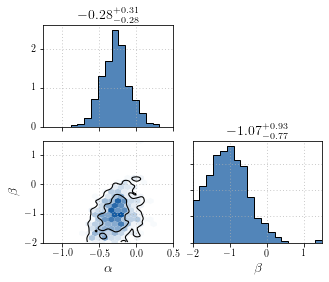

In [7]:
samps_w190814 = np.load('./../code/output/processed_emcee_samples_plPeak_w190814_r00.npy')

toPlot = {
    'a':{'data':samps_w190814[:,9],'plot_bounds':(-1.25,0.5),'label':r'$\alpha$'},
    'b':{'data':samps_w190814[:,10],'plot_bounds':(-2,1.5),'label':r'$\beta$'}
    }

fig = plt.figure(figsize=(5,4))
plot_corner(fig,toPlot,'#08519c')

fig.subplots_adjust(wspace=0.15, hspace=0.14)
fig.savefig('fig-8-b.pdf',bbox_inches='tight')
plt.show()

# Figure 9

3 0.181048266053909 0.3348095185860709
13 -0.1714106117763311 0.38891552936917484
22 0.0035133144225696685 0.2632592678635358
24 0.2687127679987838 0.4476421753166759
32 0.25755008476004276 0.3930045853468616
37 -0.021169085695209082 0.3551921659120663


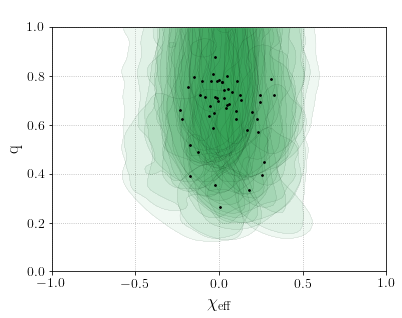

In [9]:
reweightedSampleDictInjected = np.load('injection_samples_reweightedToIsotropy.npy',allow_pickle=True)[()]

fig,ax = plt.subplots(figsize=(6,4.5))
chi_grid = np.linspace(-1,1,70)
q_grid = np.linspace(0,1,69)
dchi = chi_grid[1] - chi_grid[0]
dq = q_grid[1] - q_grid[0]

for key in list(reweightedSampleDictInjected.keys()):
    
    chis = reweightedSampleDictInjected[key]['x']
    qs = reweightedSampleDictInjected[key]['q']

    heights,edgex,edgey = np.histogram2d(chis,qs,bins=(chi_grid,q_grid))
    heights = gaussian_filter(heights,2)
    heights /= np.sum(heights)*dchi*dq
    heights_large_to_small = np.sort(heights.reshape(-1))[::-1]
    cdf = np.cumsum(heights_large_to_small)*dchi*dq
    
    num_grid_pts = np.where(cdf>0.9)[0][0]
    h90 = np.interp(0.9,cdf,heights_large_to_small)
    
    if np.median(qs)<0.45:
        print(key,np.median(chis),np.median(qs))
    
    ax.scatter([np.median(chis)],[np.median(qs)],color='black',zorder=100,s=3)
    ax.contour((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights.T,levels=(h90,np.inf),colors='black',linewidths=0.3,alpha=0.2)
    ax.contourf((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights.T,levels=(h90,np.inf),colors='#31a354',alpha=0.075)

ax.set_xlabel(r'$\chi_\mathrm{eff}$',fontsize=18)
ax.set_ylabel(r'q',fontsize=18)
ax.xaxis.grid(True,which='major',ls=':')
ax.yaxis.grid(True,which='major',ls=':')
ax.set_axisbelow(True)
ax.tick_params(labelsize=14)
ax.set_xlim(-1,1)
ax.set_ylim(0,1)

ax.set_title(' ',fontsize=20)
plt.savefig('fig-9-a.pdf',bbox_inches='tight')
plt.show()

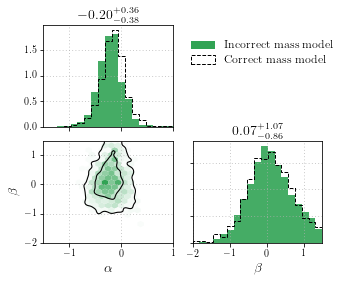

In [11]:
injection_samps_bpl = np.load('../injection-study/processed_emcee_samples_injection_bpl_r00.npy')
injection_samps_plPeak = np.load('../injection-study/processed_emcee_samples_injection_plPeak_r02.npy')

toPlot = {
    'a':{'data':injection_samps_plPeak[:,-2],'plot_bounds':(-1.5,1),'label':r'$\alpha$'},
    'b':{'data':injection_samps_plPeak[:,-1],'plot_bounds':(-2,1.5),'label':r'$\beta$'}
    }

fig = plt.figure(figsize=(5,4))
plot_corner(fig,toPlot,'#31a354',kernel=2.5,hist_alpha=0.9,lw=0)

ax = fig.axes[0]
ax.hist(injection_samps_bpl[:,-2],density=True,histtype='step',ls='--',color='black',bins=np.linspace(-1.5,1,20))

ax.legend([Rectangle((0,0),1,1,facecolor='#31a354'),Rectangle((0,0),1,1,facecolor='white',edgecolor='black',ls='--')],
                  ['Incorrect mass model','Correct mass model'],
                  fontsize=12,frameon=False,loc=(1.1,0.55),labelspacing=0.3)

ax = fig.axes[2]
ax.hist(injection_samps_bpl[:,-1],density=True,histtype='step',ls='--',color='black',bins=np.linspace(-2,1.5,20))

fig.subplots_adjust(wspace=0.15, hspace=0.14)
plt.savefig('fig-9-b.pdf',bbox_inches='tight')
plt.show()

# Figures 10 and 11

In [12]:
# Given a mean, standard deviation, and a target bound, get the integrated fraction
# of effective spins below the specified bound
def fractionNegative(mu,sig,bound):
    numerator = erf((1.+mu)/(np.sqrt(2.)*sig)) + erf((bound-mu)/(np.sqrt(2.)*sig))
    denominator = erf((1.-mu)/(np.sqrt(2.)*sig)) + erf((1.+mu)/(np.sqrt(2.)*sig))
    return numerator/denominator

# Population samples
samps = np.load('./../code/output/processed_emcee_samples_plPeak_r00.npy')

# Array of mass ratios and placeholer for integrated negative fractions
qs = np.linspace(0,1,100)
fneg = np.zeros((samps.shape[0],qs.size))

# Loop across samples
for i in range(samps.shape[0]):
    
    mu0 = samps[i,7]
    logsig0 = samps[i,8]
    alpha = samps[i,9]
    beta = samps[i,10]
    
    mu = mu0 + alpha*(qs-0.5)
    logsig = logsig0 + beta*(qs-0.5)
    fneg[i,:] = fractionNegative(mu,10**logsig,0)

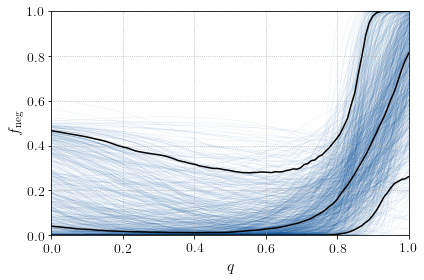

In [13]:
fig = plt.figure(figsize=(6,4))

ax = fig.add_subplot(111)
for i in range(samps.shape[0]):
    
    ax.plot(qs,fneg[i,:],color='#08519c',alpha=0.2,lw=0.2,zorder=-2)
    
ax.plot(qs,np.quantile(fneg,0.05,axis=0),color='black')
ax.plot(qs,np.quantile(fneg,0.5,axis=0),color='black')
ax.plot(qs,np.quantile(fneg,0.95,axis=0),color='black')

ax.xaxis.grid(True,which='major',ls=':')
ax.yaxis.grid(True,which='major',ls=':')
ax.set_axisbelow(True)
ax.tick_params(labelsize=14)
ax.set_xlabel(r"$q$",fontsize=16)
ax.set_ylabel(r"$f_\mathrm{neg}$",fontsize=16)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

plt.tight_layout()
plt.savefig('fig-10.pdf',bbox_inches='tight')
plt.show()

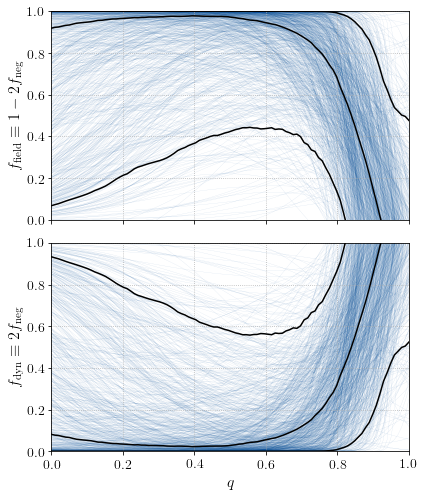

In [14]:
fig = plt.figure(figsize=(6,7))

ax = fig.add_subplot(211)
for i in range(samps.shape[0]):
    
    ax.plot(qs,1.-2.*fneg[i,:],color='#08519c',alpha=0.2,lw=0.2,zorder=-2)
    
ax.plot(qs,np.quantile(1.-2.*fneg,0.05,axis=0),color='black')
ax.plot(qs,np.quantile(1.-2.*fneg,0.5,axis=0),color='black')
ax.plot(qs,np.quantile(1.-2.*fneg,0.95,axis=0),color='black')

ax.xaxis.grid(True,which='major',ls=':')
ax.yaxis.grid(True,which='major',ls=':')
ax.set_axisbelow(True)
ax.set_xticklabels([])
ax.tick_params(labelsize=14)
ax.set_ylabel(r"$f_\mathrm{field} \equiv 1-2f_\mathrm{neg}$",fontsize=16)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax = fig.add_subplot(212)
for i in range(samps.shape[0]):
    
    ax.plot(qs,2.*fneg[i,:],color='#08519c',alpha=0.2,lw=0.2,zorder=-2)

ax.plot(qs,np.quantile(2.*fneg,0.05,axis=0),color='black')
ax.plot(qs,np.quantile(2.*fneg,0.5,axis=0),color='black')
ax.plot(qs,np.quantile(2.*fneg,0.95,axis=0),color='black')   
    
ax.xaxis.grid(True,which='major',ls=':')
ax.yaxis.grid(True,which='major',ls=':')
ax.set_axisbelow(True)
ax.tick_params(labelsize=14)
ax.set_xlabel(r"$q$",fontsize=16)
ax.set_ylabel(r"$f_\mathrm{dyn}\equiv 2 f_\mathrm{neg}$",fontsize=16)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

plt.tight_layout()
plt.savefig('fig-11.pdf',bbox_inches='tight')
plt.show()

# Figure 12

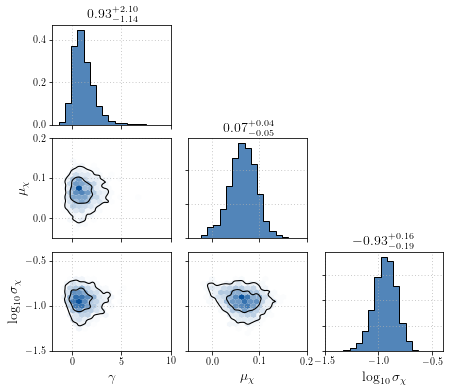

In [15]:
samps_no_evol = np.load('../code/output/processed_emcee_samples_plPeak_noEvol_r00.npy')

toPlot = {
    'beta':{'data':samps_no_evol[:,5],'plot_bounds':(-2,10),'label':r'$\gamma$'},
    'mu0':{'data':samps_no_evol[:,7],'plot_bounds':(-0.05,0.2),'label':r'$\mu_\chi$'},
    'sig0':{'data':samps_no_evol[:,8],'plot_bounds':(-1.5,-0.4),'label':r'$\log_{10}\sigma_\chi$'}
    }             

fig = plt.figure(figsize=(7,6))
plot_corner(fig,toPlot,'#08519c')
fig.subplots_adjust(wspace=0.15, hspace=0.14)
plt.savefig('fig-12.pdf',bbox_inches='tight',dpi=200)
plt.show()

# Figure 13

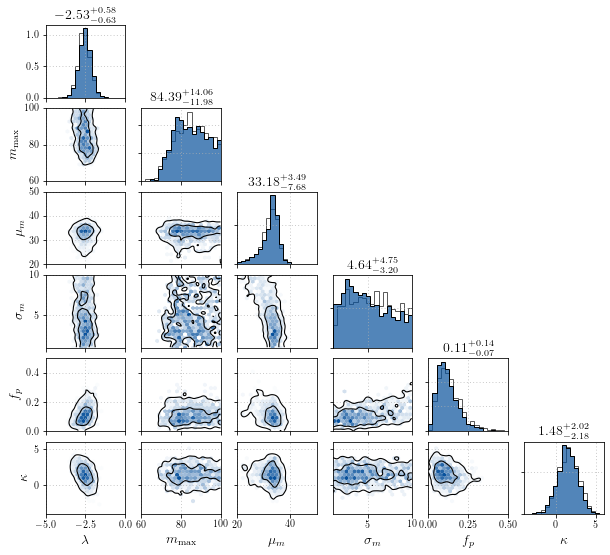

In [16]:
samps = np.load('../code/output/processed_emcee_samples_plPeak_r00.npy')
samps_no_evol = np.load('../code/output/processed_emcee_samples_plPeak_noEvol_r00.npy')

toPlot = {
    'lambda':{'data':samps[:,0],'plot_bounds':(-5,0),'label':r'$\lambda$'},
    'mMax':{'data':samps[:,1],'plot_bounds':(60,100),'label':r'$m_\mathrm{max}$'},
    'mu_m':{'data':samps[:,2],'plot_bounds':(20,50),'label':r'$\mu_m$'},
    'sig_m':{'data':samps[:,3],'plot_bounds':(1,10),'label':r'$\sigma_m$'},
    'f_p':{'data':samps[:,4],'plot_bounds':(0,0.5),'label':r'$f_p$'},
    'kappa':{'data':samps[:,6],'plot_bounds':(-4,6),'label':r'$\kappa$'}
}

fig = plt.figure(figsize=(10,9))
plot_corner(fig,toPlot,'#08519c',kernel=3)

axes = fig.axes
axes[0].hist(samps_no_evol[:,0],bins=np.linspace(-5,0,20),density=True,histtype='step',color='#5c5c5c',lw=1.,zorder=-1)
axes[6].hist(samps_no_evol[:,1],bins=np.linspace(60,100,20),density=True,histtype='step',color='#5c5c5c',lw=1.,zorder=-1)
axes[11].hist(samps_no_evol[:,2],bins=np.linspace(20,50,20),density=True,histtype='step',color='#5c5c5c',lw=1.,zorder=-1)
axes[15].hist(samps_no_evol[:,3],bins=np.linspace(1,10,20),density=True,histtype='step',color='#5c5c5c',lw=1.,zorder=-1)
axes[18].hist(samps_no_evol[:,4],bins=np.linspace(0,0.5,20),density=True,histtype='step',color='#5c5c5c',lw=1.,zorder=-1)
axes[20].hist(samps_no_evol[:,6],bins=np.linspace(-4,6,20),density=True,histtype='step',color='#5c5c5c',lw=1.,zorder=-1)

fig.subplots_adjust(wspace=0.2, hspace=0.15)
fig.savefig('fig-13.pdf',bbox_inches='tight')
plt.show()